In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import math as math
import os
import matplotlib.pyplot as plt

In [2]:
# IMPORTACIÓN DE LA BASE DE DATOS
df = pd.read_csv("df_final.csv")
del df["Unnamed: 0"]

In [3]:
# DESCRIPTIVA PARA LAS VARIABLES NÚMERICAS
df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,...,jumio,government_id,offline_government_id,selfie,identity_manual,facebook,work_email,google,latitude,longitude
count,1.325200e+04,1.325200e+04,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,...,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000
mean,2.695022e+07,1.098365e+08,90.607757,82.597299,26.695819,1.678765,2.314066,96.162843,4.487857,4.642631,...,0.608512,0.697178,0.507546,0.349381,0.327271,0.128132,0.174691,0.040899,41.392081,2.167541
std,1.569341e+07,1.181837e+08,16.657503,23.955375,128.798159,0.984274,1.826875,94.442147,0.667453,0.475530,...,0.488102,0.459496,0.499962,0.476793,0.469235,0.334249,0.379717,0.198065,0.014308,0.017475
min,1.867400e+04,3.073000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.352610,2.091590
25%,1.384005e+07,8.130906e+06,89.000000,74.600000,1.000000,1.000000,1.000000,40.000000,4.360000,4.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.380888,2.157437
50%,2.719036e+07,5.080867e+07,98.000000,93.400000,3.000000,1.000000,2.000000,70.000000,4.660000,4.780000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.389660,2.168605
75%,4.102172e+07,1.942325e+08,100.000000,99.600000,16.000000,2.000000,3.000000,121.000000,4.858000,4.930000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.401640,2.177623
max,5.217956e+07,4.199209e+08,100.000000,100.000000,2178.000000,12.000000,20.000000,999.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.461930,2.227710


In [4]:
df[df.iloc[:,26:89].columns] = df[df.iloc[:,26:89].columns].astype("int")

Crearemos dos carpetas para guardar todos los graficos.

In [5]:
os.mkdir("Graficos float")
os.mkdir("Graficos integer")
os.mkdir("Graficos category")

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'Graficos float'

Pasamos a hacer todos los graficos para las variables "float"

In [6]:
df.select_dtypes(['float']).columns
var_float = df.select_dtypes(['float']).columns

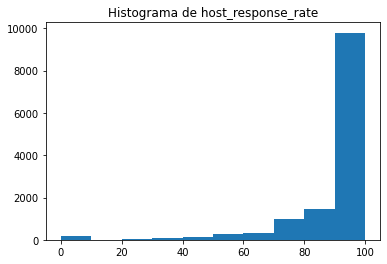

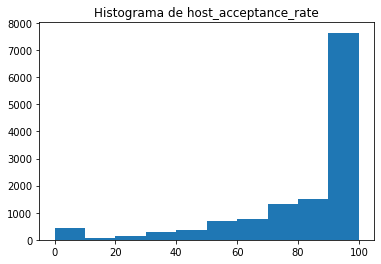

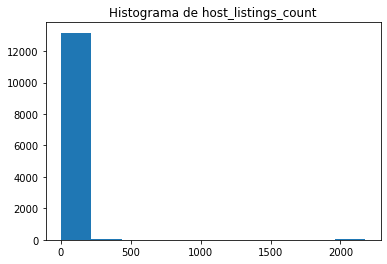

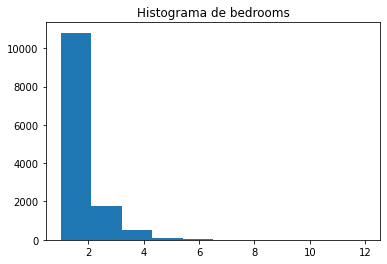

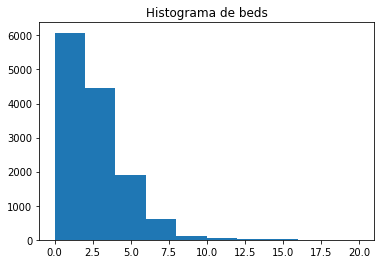

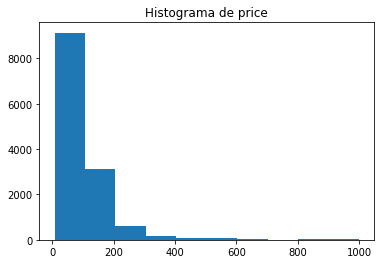

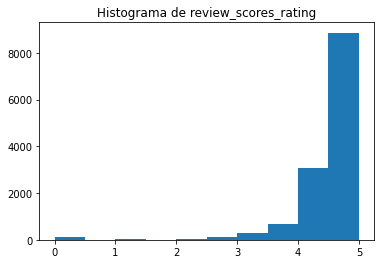

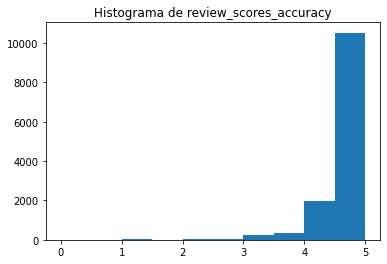

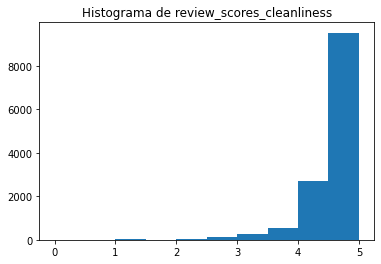

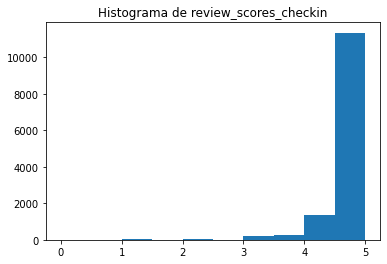

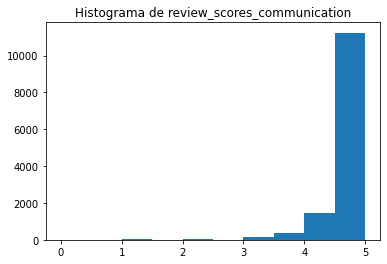

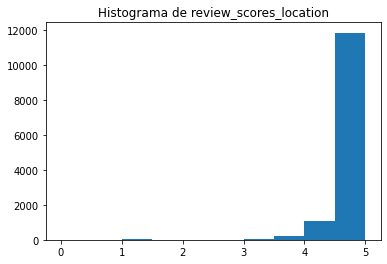

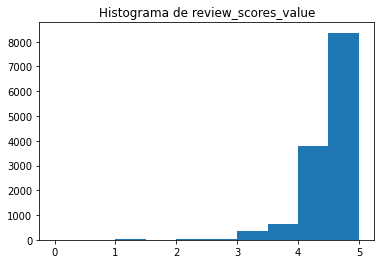

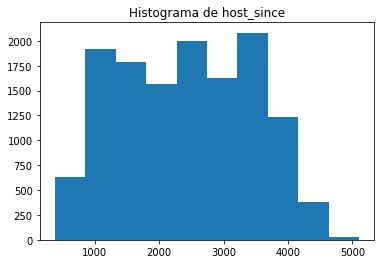

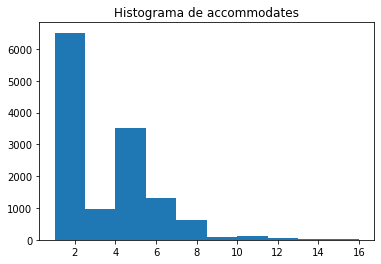

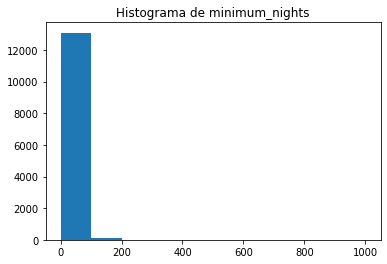

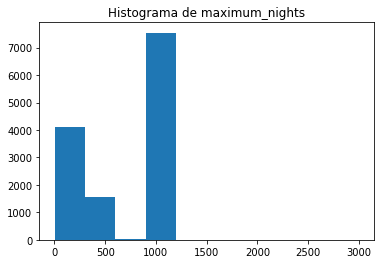

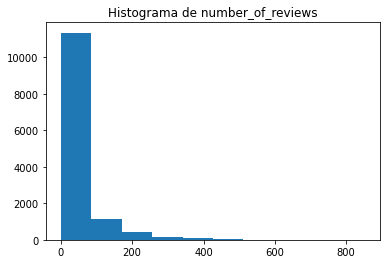

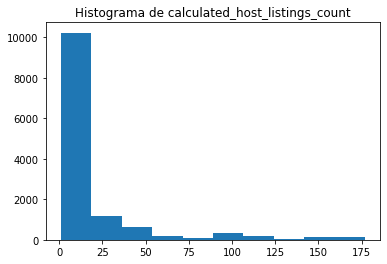

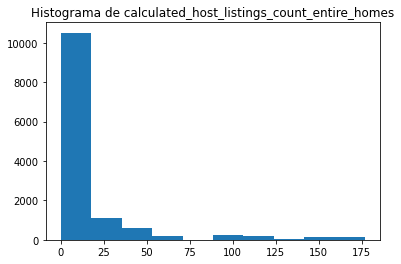

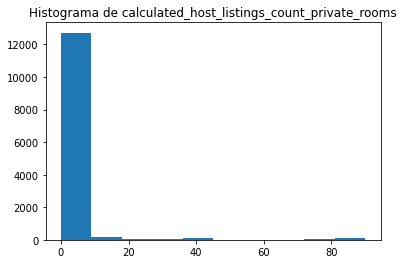

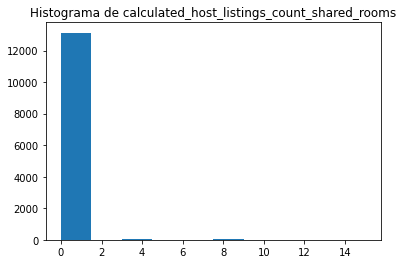

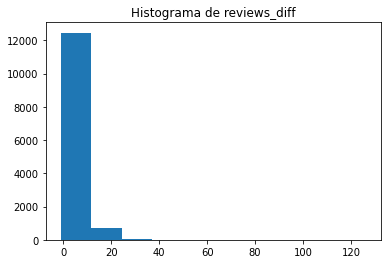

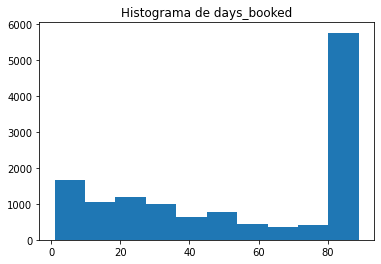

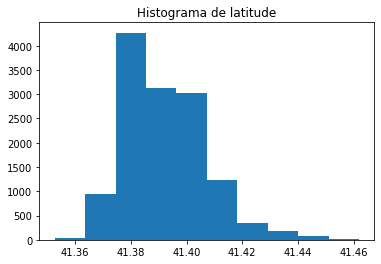

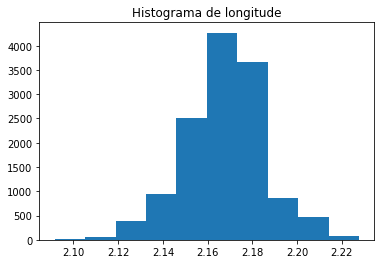

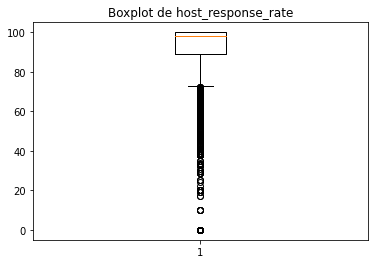

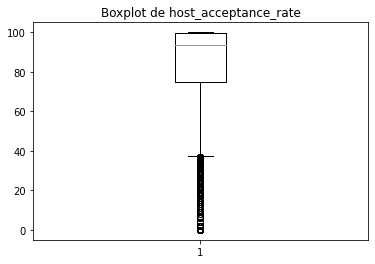

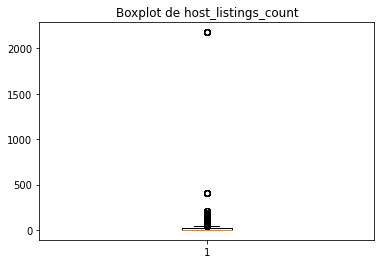

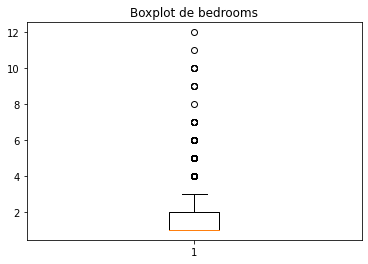

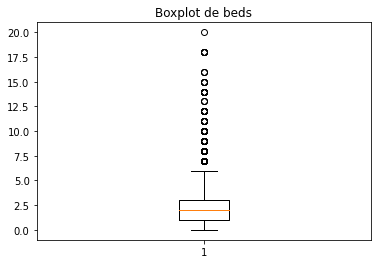

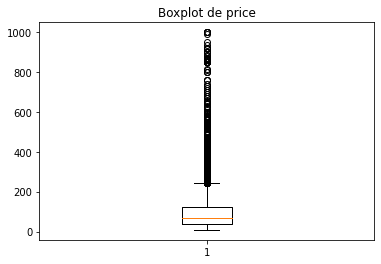

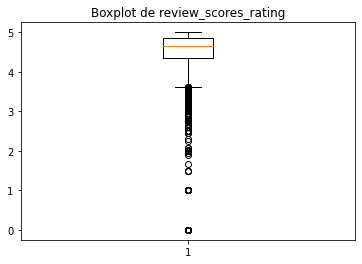

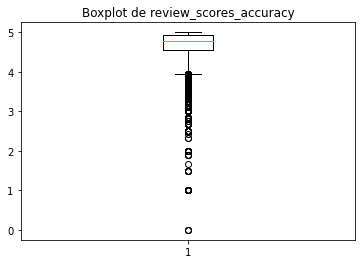

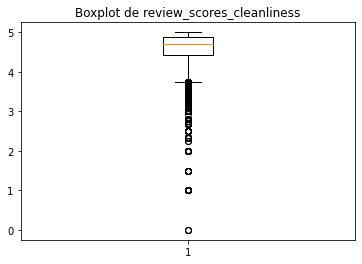

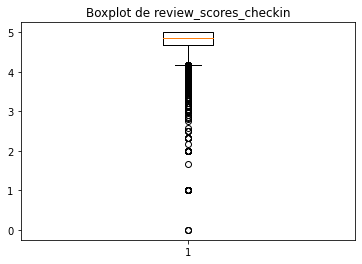

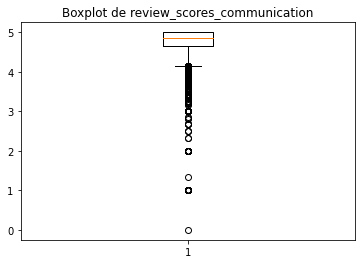

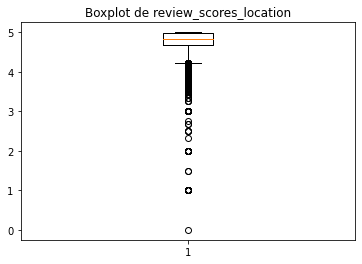

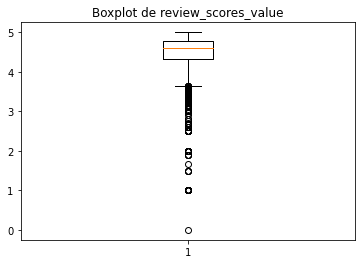

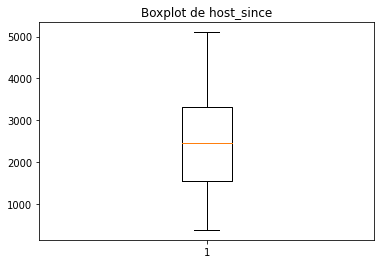

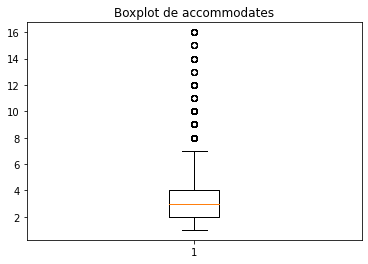

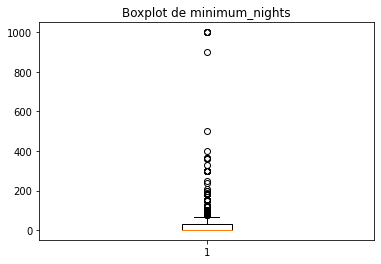

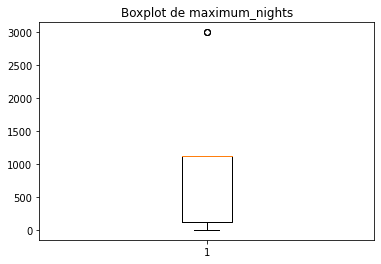

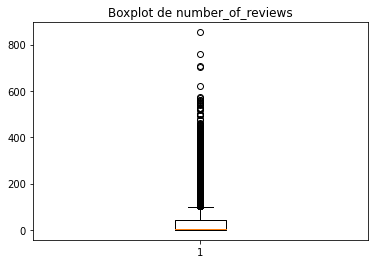

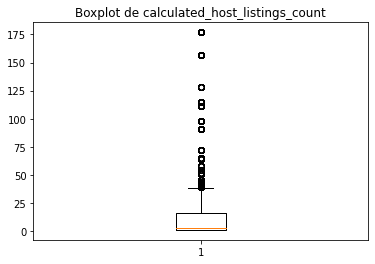

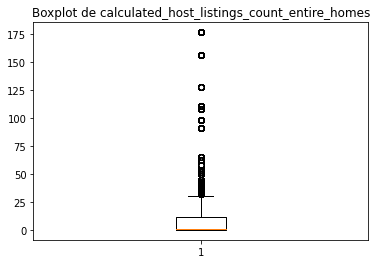

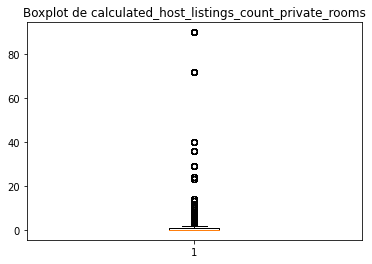

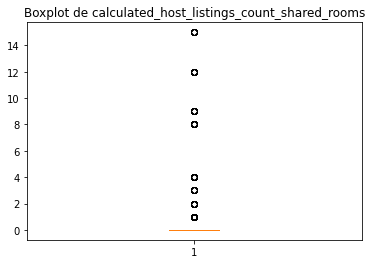

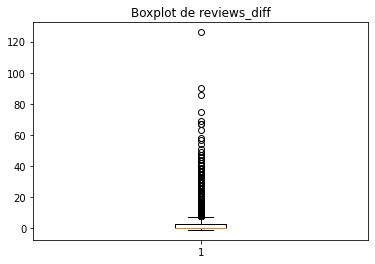

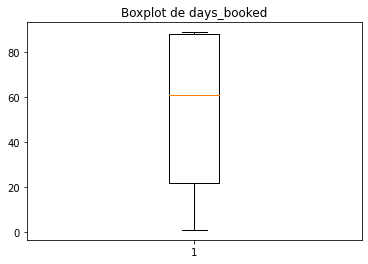

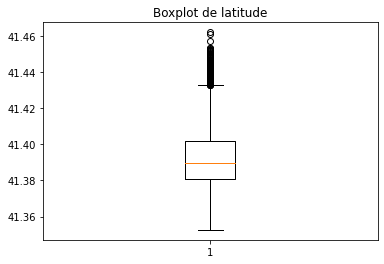

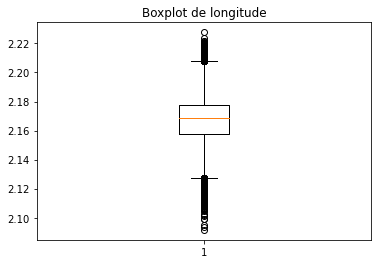

In [7]:
os.chdir("E:\Data\TFG\Graficos float")

for col in var_float:
    plt.hist(x = col, data = df)
    plt.title("Histograma de " + col)
    plt.savefig("Histograma de " + col + ".png")
    plt.show()

for col in var_float:
    plt.boxplot(x = col, data = df)
    plt.title("Boxplot de " + col)
    plt.savefig("Boxplot de " + col + ".png")
    plt.show()

Hacemos los graficos de "calculated_host_listings_count" pero eliminando las repeticiones de "host_id".

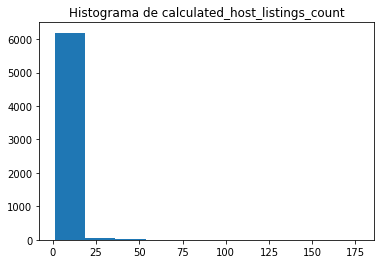

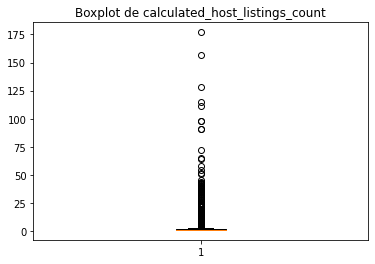

In [7]:
plt.hist(x = df.drop_duplicates(subset="host_id")["calculated_host_listings_count"])
plt.title("Histograma de calculated_host_listings_count")
plt.show()

plt.boxplot(x = df.drop_duplicates(subset="host_id")["calculated_host_listings_count"])
plt.title("Boxplot de calculated_host_listings_count" )
plt.show()

In [8]:
# Cambiamos de nombre la columna "Pack \u2019n Play/travel crib" ya que da problemas para guardar el grafico
df.rename(columns = {'Pack \\u2019n Play/travel crib' : "Pack u2019n Play travel crib"}, inplace = True)

df.select_dtypes(['int']).columns
var_int = df.select_dtypes(['int']).columns
var_int = var_int.drop(["id","host_id"])

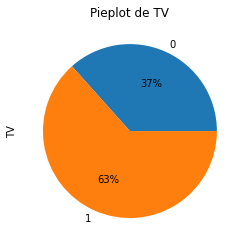

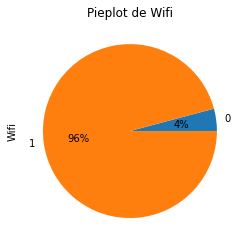

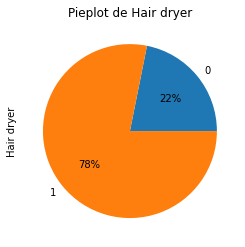

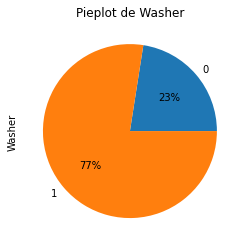

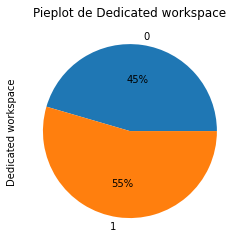

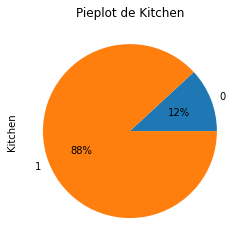

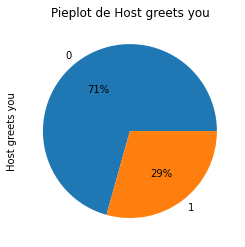

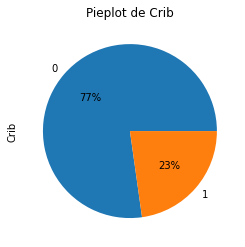

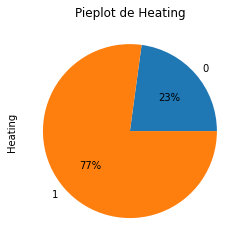

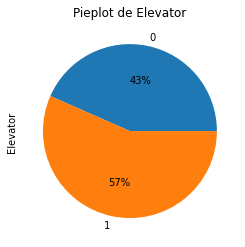

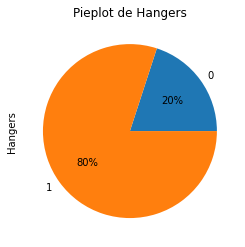

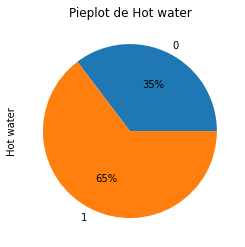

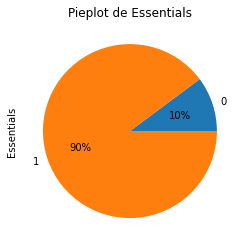

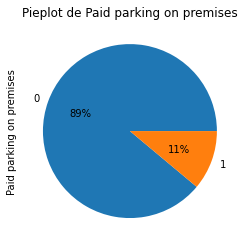

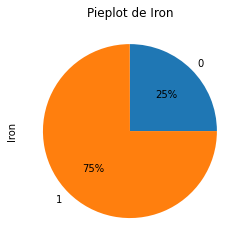

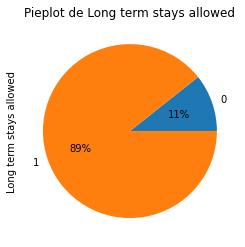

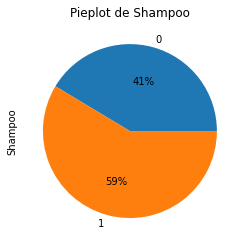

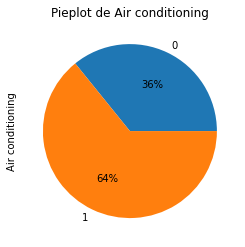

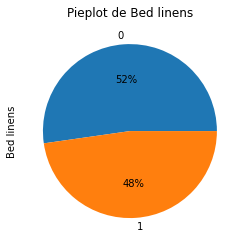

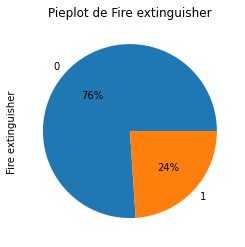

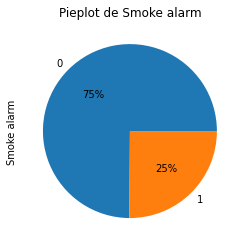

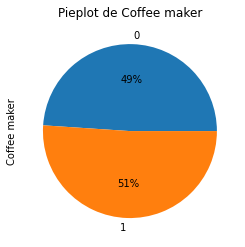

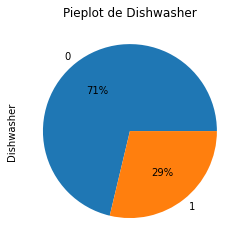

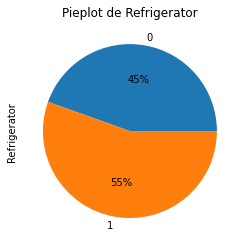

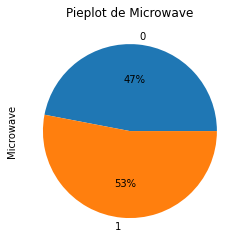

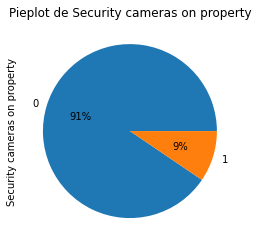

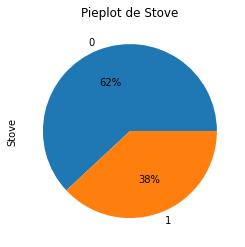

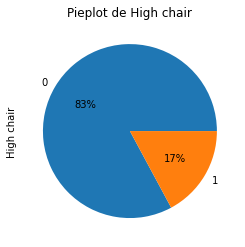

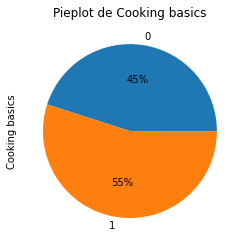

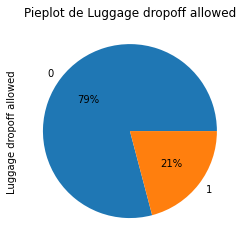

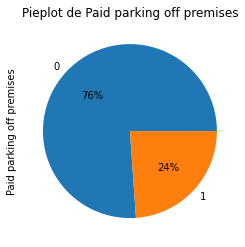

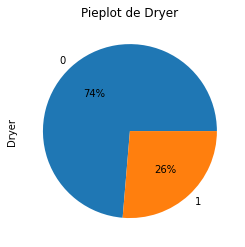

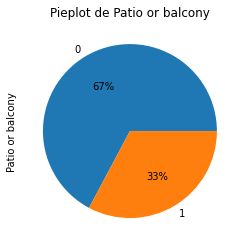

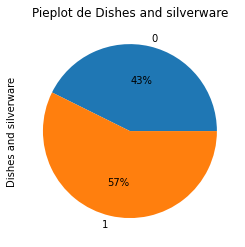

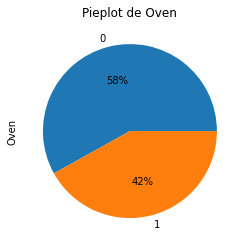

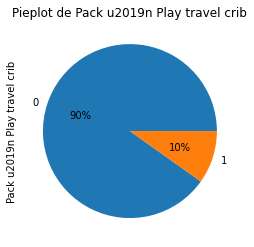

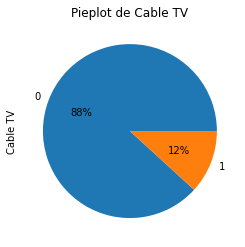

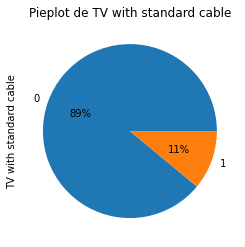

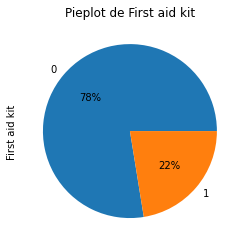

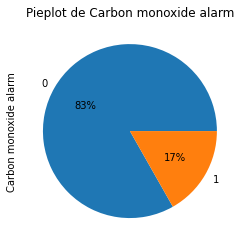

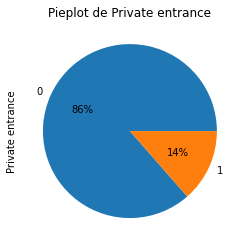

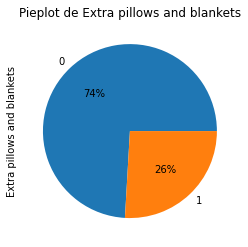

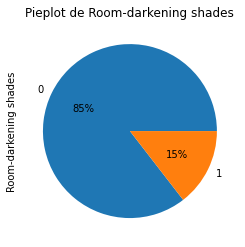

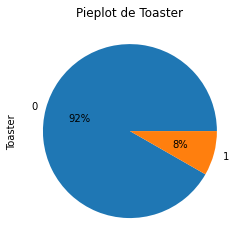

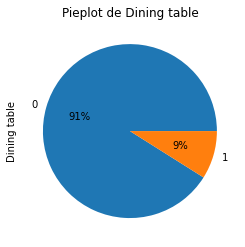

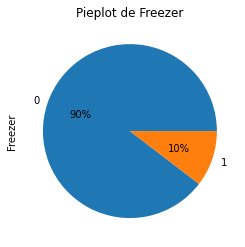

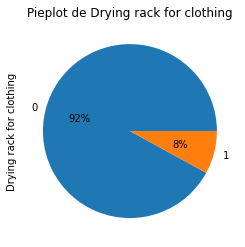

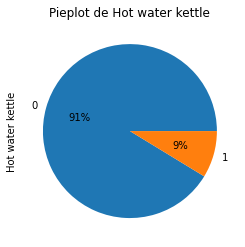

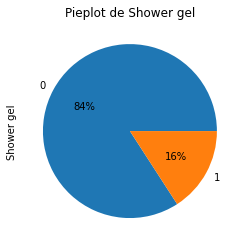

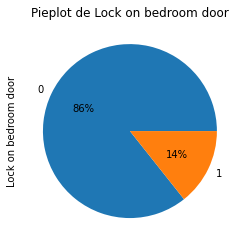

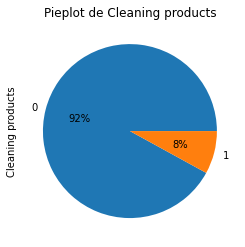

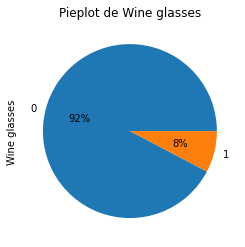

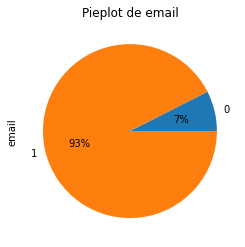

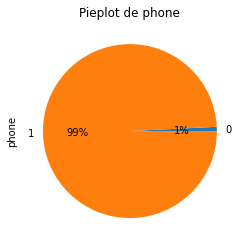

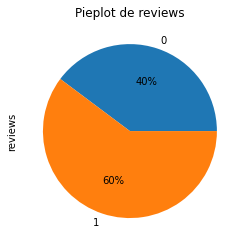

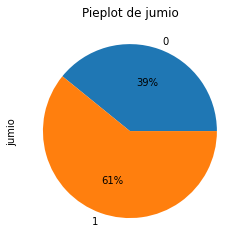

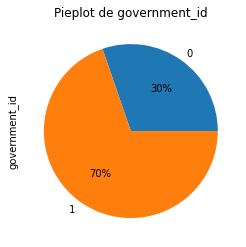

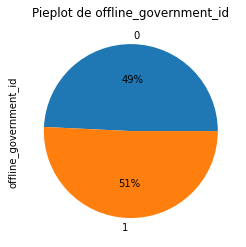

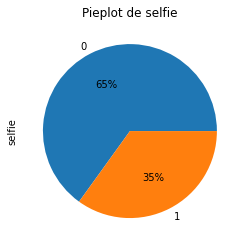

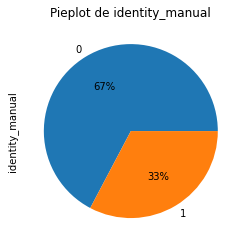

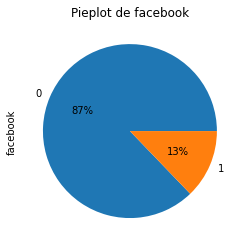

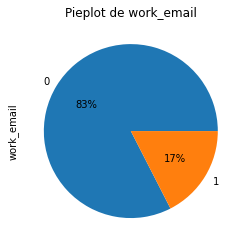

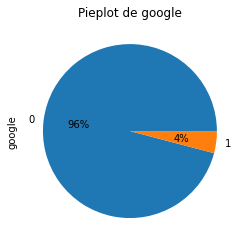

In [9]:
os.chdir("E:\Data\TFG\Graficos integer")

for col in var_int:
    counts = df[col].value_counts().sort_index()
    counts.plot(kind = "pie",autopct='%.0f%%')
    plt.title("Pieplot de " + col)
    plt.savefig("Pieplot de " + col + ".png")
    plt.show()

Hacemos finalmente para las variables category.

In [10]:
df[df.select_dtypes(['object']).columns] = df[df.select_dtypes(['object']).columns].astype("category")
var_cat = df.select_dtypes(['category']).columns

C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:7: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.savefig("Barplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:7: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig("Barplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:7: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.savefig("Barplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:7: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.savefig("Barplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:7: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.savefig("Barplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\32

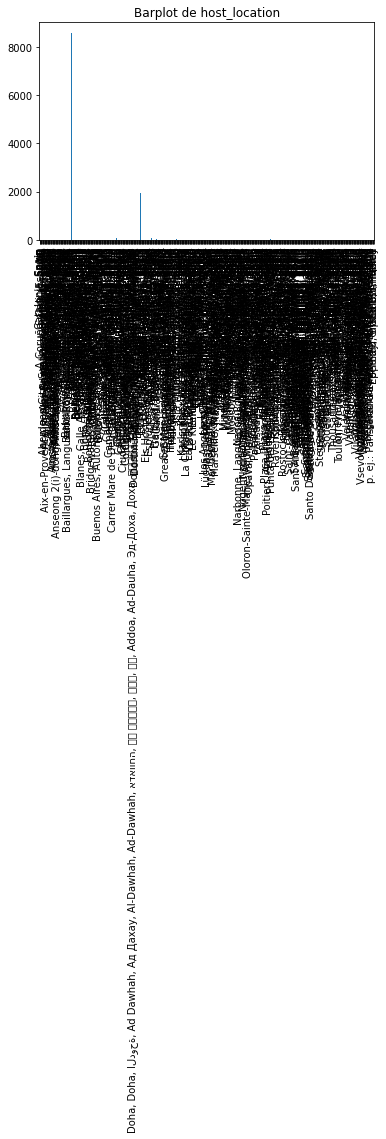

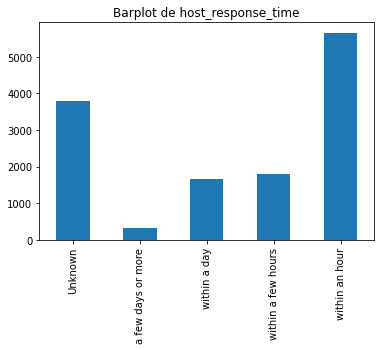

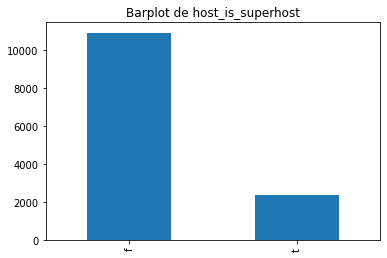

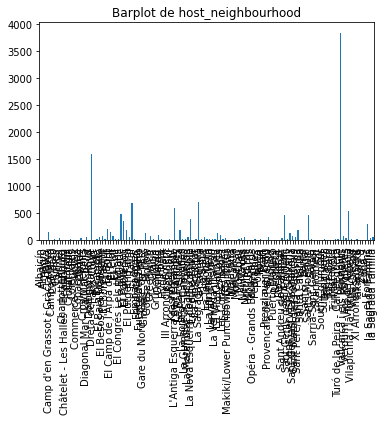

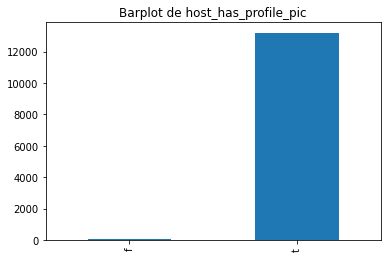

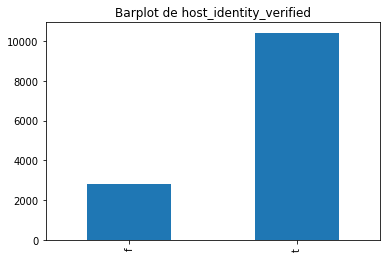

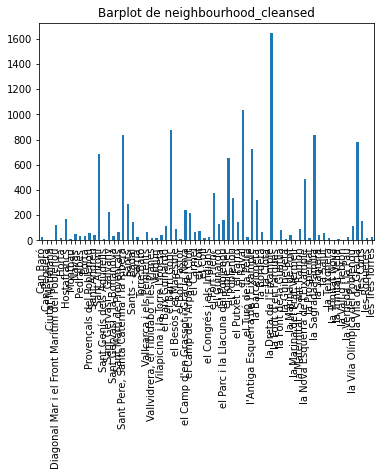

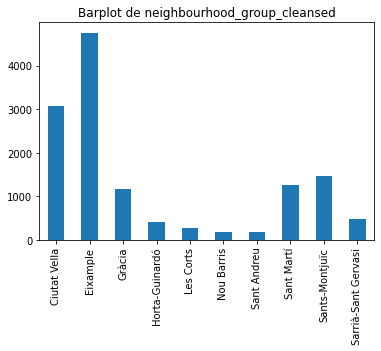

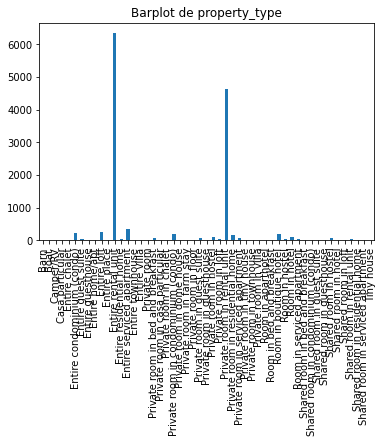

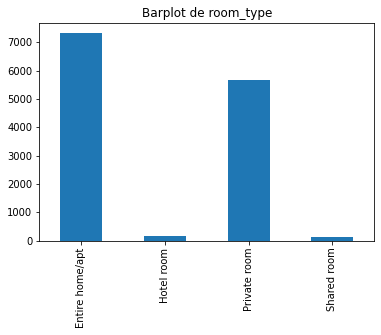

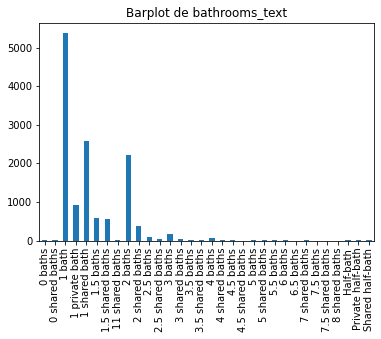

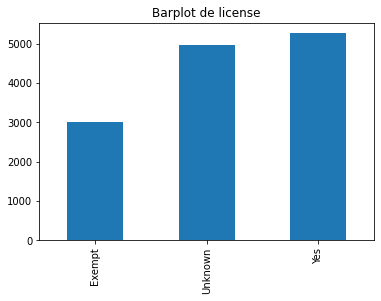

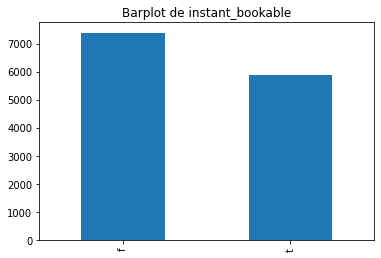

C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:14: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.savefig("Pieplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:14: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig("Pieplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:14: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.savefig("Pieplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:14: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.savefig("Pieplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_10164\3264063791.py:14: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.savefig("Pieplot de " + col + ".png")
C:\Users\Andreu\AppData\Local\Temp\ipykernel_101

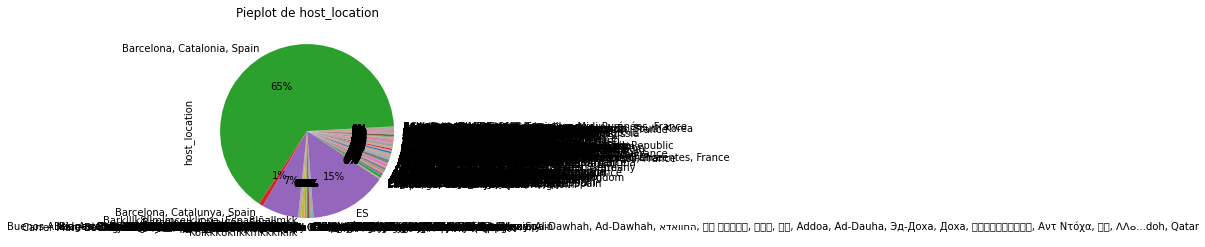

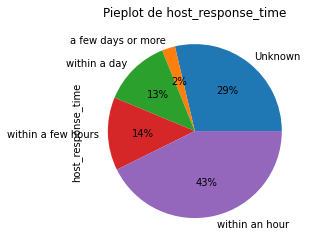

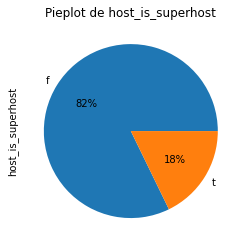

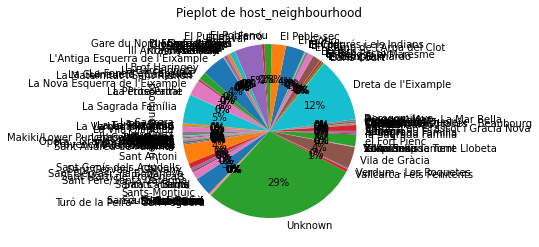

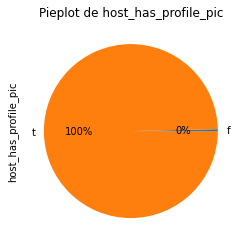

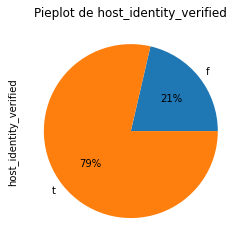

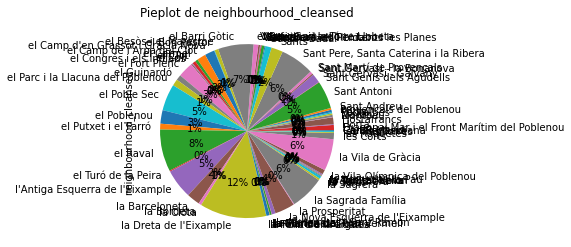

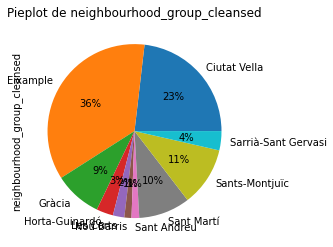

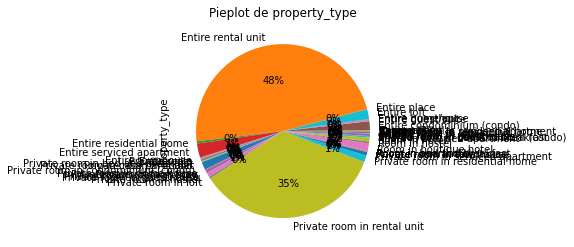

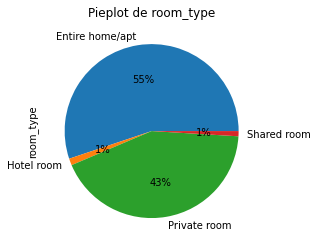

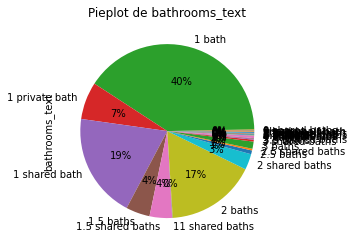

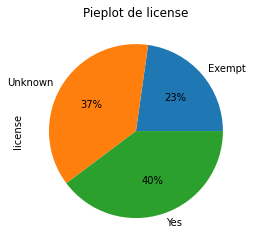

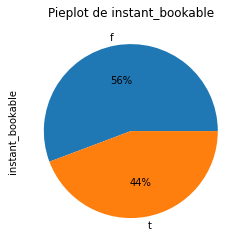

Barcelona, Catalonia, Spain           8588
ES                                    1922
Barcelona, Cataluña, Spain             901
Barcelona, Catalunya, Spain            114
Madrid, Community of Madrid, Spain      89
                                      ... 
Istanbul, Turkey                         1
Israel                                   1
Isla Mujeres, Quintana Roo, Mexico       1
Ingolstadt, Bavaria, Germany             1
Երևան, Երևան, Armenia                    1
Name: host_location, Length: 545, dtype: int64
within an hour        5657
Unknown               3800
within a few hours    1801
within a day          1668
a few days or more     326
Name: host_response_time, dtype: int64
f    10895
t     2357
Name: host_is_superhost, dtype: int64
Unknown                            3837
Dreta de l'Eixample                1585
La Sagrada Família                  699
El Raval                            673
L'Antiga Esquerra de l'Eixample     586
                                   ... 
Krasno

In [22]:
os.chdir("E:\Data\TFG\Graficos category")

for col in var_cat:
    counts = df[col].value_counts().sort_index()
    counts.plot(kind = "bar")
    plt.title("Barplot de " + col)
    plt.savefig("Barplot de " + col + ".png")
    plt.show()

for col in var_cat:
    counts = df[col].value_counts().sort_index()
    counts.plot(kind = "pie",autopct='%.0f%%')
    plt.title("Pieplot de " + col)
    plt.savefig("Pieplot de " + col + ".png")
    plt.show()


In [26]:
print(len(df["host_location"].unique()))
print(len(df["host_neighbourhood"].unique()))
print(len(df["neighbourhood_cleansed"].unique()))
print(len(df["property_type"].unique()))

545
125
70
51
